In [302]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [303]:
df = pd.read_csv('covid_19_in_education.csv')

In [304]:
df.head(5)

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,Unnamed: 9,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,4.570530e+15,17-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,NaN,1,Every day,Irregularly
1,6.440170e+15,29-03-2021,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,NaN,1,No,Irregularly
2,5.001170e+15,18-03-2021,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,NaN,1,No,There are not enough
3,5.524930e+15,24-03-2021,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,NaN,1,No,There are enough
4,5.032520e+15,18-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,NaN,1,No,There are not enough


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 13 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   submission_id                                                   4436 non-null   float64
 1   submission_date                                                 4436 non-null   object 
 2   gender                                                          4436 non-null   object 
 3   age                                                             4436 non-null   object 
 4   geography                                                       4436 non-null   object 
 5   financial_situation                                             4436 non-null   object 
 6   education                                                       4436 non-null   object 
 7   employment_status                                  

# Data Preprocessing

### Handling Missing Data

In [306]:
df.isnull().sum()

submission_id                                                        0
submission_date                                                      0
gender                                                               0
age                                                                  0
geography                                                            0
financial_situation                                                  0
education                                                            0
employment_status                                                    0
submission_state                                                     0
Unnamed: 9                                                        4436
can_children_observe_deterioration_of_basic_services_of_school       0
do_children_3_and_17_yrs_receive_regular_school_meals                0
are_there_teachers_at_scheduled_class_hours                          0
dtype: int64

In [307]:
df = df.drop(['Unnamed: 9'], axis=1)

In [308]:
df.isnull().sum()

submission_id                                                     0
submission_date                                                   0
gender                                                            0
age                                                               0
geography                                                         0
financial_situation                                               0
education                                                         0
employment_status                                                 0
submission_state                                                  0
can_children_observe_deterioration_of_basic_services_of_school    0
do_children_3_and_17_yrs_receive_regular_school_meals             0
are_there_teachers_at_scheduled_class_hours                       0
dtype: int64

### Handling Duplicate Data

In [309]:
df.duplicated().sum()

0

### Handling Outliers

**Gender**

In [310]:
df['gender'].value_counts()

Female                  2341
Male                    2054
Prefer not to answer      35
Non-Binary                 5
Not Available              1
Name: gender, dtype: int64

Replacing not available data with Mode of column

In [311]:
df.loc[df["gender"] == "Not Available", "gender"] = 'Female'

**Age**

In [312]:
df['age'].value_counts()

26 to 35 years old    1304
16 to 25 years old    1302
36 to 45 years old    1087
Over 45 years old      739
Not Available            3
Under 16                 1
Name: age, dtype: int64

In [313]:
df.loc[df["age"] == "Not Available", "age"] = '26 to 35 years old'

**Geography**

In [314]:
df['geography'].value_counts()

City center or metropolitan area    1920
Suburban/Peri-urban                 1374
Rural                               1141
Not Available                          1
Name: geography, dtype: int64

Replacing not available data with Mode of column

In [315]:
df.loc[df["geography"] == "Not Available", 'geography'] = 'City center or metropolitan area'

**Financial Situation**

In [316]:
df['financial_situation'].value_counts()

I can afford food, but nothing else                                                1445
I cannot afford enough food for my family                                          1163
I can afford food and regular expenses, but nothing else                           1060
I can afford food, regular expenses, and clothes, but nothing else                  244
Prefer not to answer                                                                239
I can comfortably afford food, clothes, and furniture, and I have savings           157
I can comfortably afford food, clothes, and furniture, but I don’t have savings     127
Not Available                                                                         1
Name: financial_situation, dtype: int64

Replacing not available data with Mode of column

In [317]:
df.loc[df["financial_situation"] == "Not Available", "financial_situation"] = 'I can afford food, but nothing else'

**Education**

In [318]:
df['education'].value_counts()

University or college degree completed               1327
Secondary school/ high school completed              1089
Technical school diploma or degree completed          580
Some university or college                            379
Some technical education (e.g polytechnic school)     322
Some secondary school / high school                   279
Post-graduate education                               241
Primary school completed                               98
Prefer not to answer                                   58
Some primary education                                 36
No formal education                                    20
College or university                                   3
Not available                                           1
Post graduate                                           1
Technical school                                        1
Secondary/high school                                   1
Name: education, dtype: int64

**Employment Status**

In [319]:
df['employment_status'].value_counts()

I work part-time, either as an employee or self-employed             1130
I work full-time, either as an employee or self-employed             1038
I am unemployed                                                       618
I am a student                                                        594
I am a student and I work part-time                                   379
I do housework, fulfilling domestic tasks, looking after children     356
None of the above                                                     165
I am retired                                                          120
I am unable to work due to long-term illness or disability             16
I am doing community or military service                               13
Employed full-time                                                      3
Not Available                                                           1
Retired                                                                 1
Student                               

**Submission State**

In [320]:
df['submission_state'].value_counts()

Miranda             732
Zulia               611
Distrito Federal    556
Táchira             462
Lara                354
Anzoátegui          346
Bolívar             245
Aragua              169
Sucre               164
Carabobo            161
Mérida               91
Falcón               67
Monagas              66
Guárico              58
Apure                54
Portuguesa           54
Trujillo             53
Yaracuy              48
Vargas               46
Nueva Esparta        38
Barinas              32
Cojedes              18
Delta Amacuro         9
Amazonas              2
Name: submission_state, dtype: int64

In [321]:
df['can_children_observe_deterioration_of_basic_services_of_school'].value_counts()

1    3551
0     885
Name: can_children_observe_deterioration_of_basic_services_of_school, dtype: int64

In [322]:
df['do_children_3_and_17_yrs_receive_regular_school_meals'].value_counts()

No           3838
Every day     204
2 days        154
1 day         115
3 days         91
4 days         34
Name: do_children_3_and_17_yrs_receive_regular_school_meals, dtype: int64

In [323]:
df['are_there_teachers_at_scheduled_class_hours'].value_counts()

Irregularly             2183
There are not enough    1148
There are enough        1105
Name: are_there_teachers_at_scheduled_class_hours, dtype: int64

# Exploratory Data Analysis

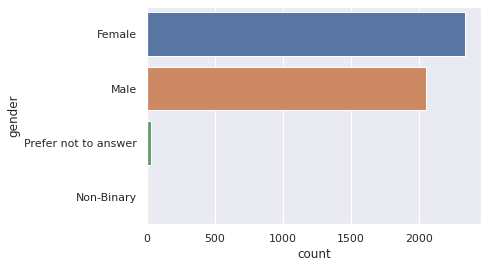

In [324]:
sns.countplot(y="gender", data=df)

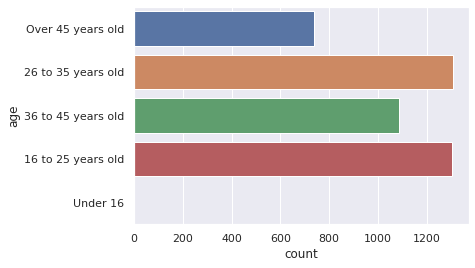

In [325]:
sns.countplot(y="age", data=df)

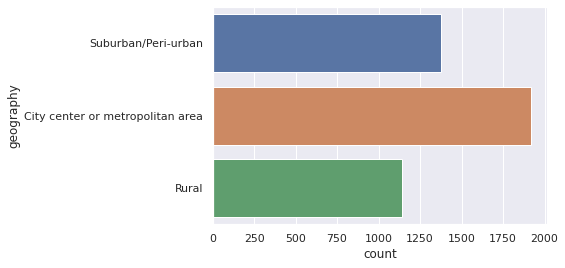

In [326]:
sns.countplot(y="geography", data=df)

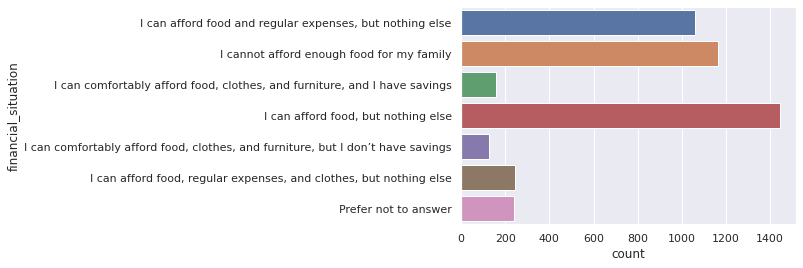

In [327]:
sns.countplot(y="financial_situation", data=df)

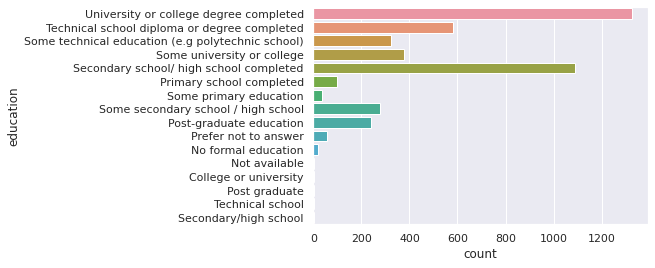

In [328]:
sns.countplot(y="education", data=df)

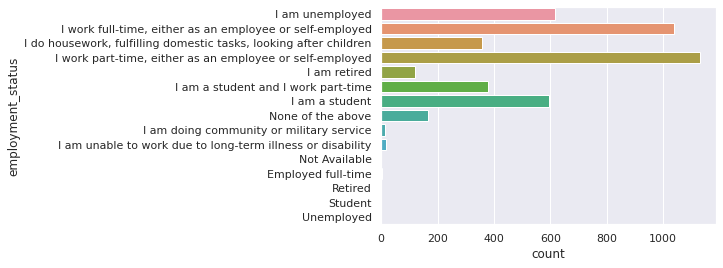

In [329]:
sns.countplot(y="employment_status", data=df)

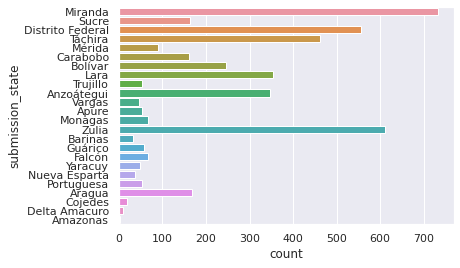

In [330]:
sns.countplot(y="submission_state", data=df)

In [331]:
num_list = ['can_children_observe_deterioration_of_basic_services_of_school','do_children_3_and_17_yrs_receive_regular_school_meals','are_there_teachers_at_scheduled_class_hours']

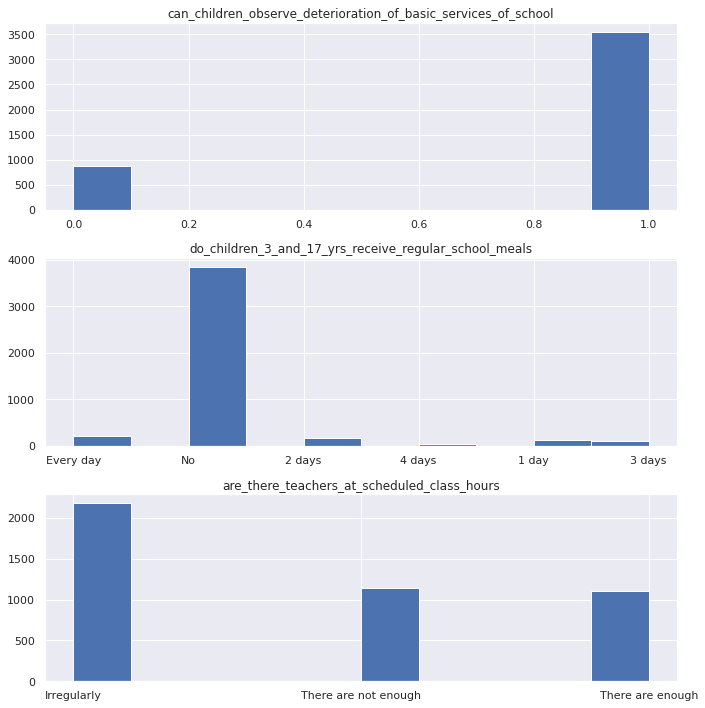

In [332]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_list)):
    
    plt.subplot(3, 1, i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

# Feature Selection

In [333]:
df['gender']=df['gender'].map({'Female':1, 'Male':2, 'Prefer not to answer':0, 'Non-Binary':0,'Not Available':0})
df['age']=df['age'].map({'Over 45 years old':5, '26 to 35 years old':3, '36 to 45 years old':4,'16 to 25 years old':2, 'Under 16':1, 'Not Available':0})
df['geography']=df['geography'].map({'Suburban/Peri-urban':2, 'City center or metropolitan area':3, 'Rural':1,'Not Available':0})
df['financial_situation']=df['financial_situation'].map({'I can afford food and regular expenses, but nothing else':3,
       'I cannot afford enough food for my family':1,
       'I can comfortably afford food, clothes, and furniture, and I have savings':6,
       'I can afford food, but nothing else':2,
       'I can comfortably afford food, clothes, and furniture, but I don’t have savings':5,
       'I can afford food, regular expenses, and clothes, but nothing else':4,
       'Prefer not to answer':0, 'Not Available':0})
df['education']=df['education'].map({'University or college degree completed':4,
       'Technical school diploma or degree completed':5,
       'Some technical education (e.g polytechnic school)':3,
       'Some university or college':4,
       'Secondary school/ high school completed':2,
       'Primary school completed':1, 'Some primary education':1,
       'Some secondary school / high school':2, 'Post-graduate education':5,
       'Prefer not to answer':0, 'No formal education':0, 'Not available':0,
       'College or university':4, 'Post graduate':5, 'Technical school':3,
       'Secondary/high school':2})
df['employment_status']=df['employment_status'].map({'I am unemployed':0,
       'I work full-time, either as an employee or self-employed':6,
       'I do housework, fulfilling domestic tasks, looking after children':4,
       'I work part-time, either as an employee or self-employed':2,
       'I am retired':3, 'I am a student and I work part-time':2,
       'I am a student':1, 'None of the above':0,
       'I am doing community or military service':5,
       'I am unable to work due to long-term illness or disability':0,
       'Not Available':0, 'Employed full-time':6, 'Retired':3, 'Student':1,
       'Unemployed':0})
df['do_children_3_and_17_yrs_receive_regular_school_meals']=df['do_children_3_and_17_yrs_receive_regular_school_meals'].map({'Every day':5, 'No':0, '2 days':2, '4 days':4, '1 day':1, '3 days':3})
df['are_there_teachers_at_scheduled_class_hours']=df['are_there_teachers_at_scheduled_class_hours'].map({'Irregularly':0, 'There are not enough':1, 'There are enough':2})

In [334]:
df

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,4.570530e+15,17-03-2021,1,5,2,3,4,0,Miranda,1,5,0
1,6.440170e+15,29-03-2021,2,3,2,1,4,0,Miranda,1,0,0
2,5.001170e+15,18-03-2021,1,3,3,6,4,6,Miranda,1,0,1
3,5.524930e+15,24-03-2021,2,4,2,2,4,6,Miranda,1,0,2
4,5.032520e+15,18-03-2021,1,5,2,3,4,0,Miranda,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5.229260e+15,22-03-2021,1,5,2,2,4,6,Anzoátegui,0,0,0
4432,6.520660e+15,19-03-2021,1,5,1,2,1,2,Anzoátegui,1,0,1
4433,5.222700e+15,25-03-2021,2,2,2,4,5,2,Anzoátegui,1,3,0
4434,6.150640e+15,13-03-2021,1,5,2,3,4,6,Anzoátegui,1,0,0


# Correlation Analysis

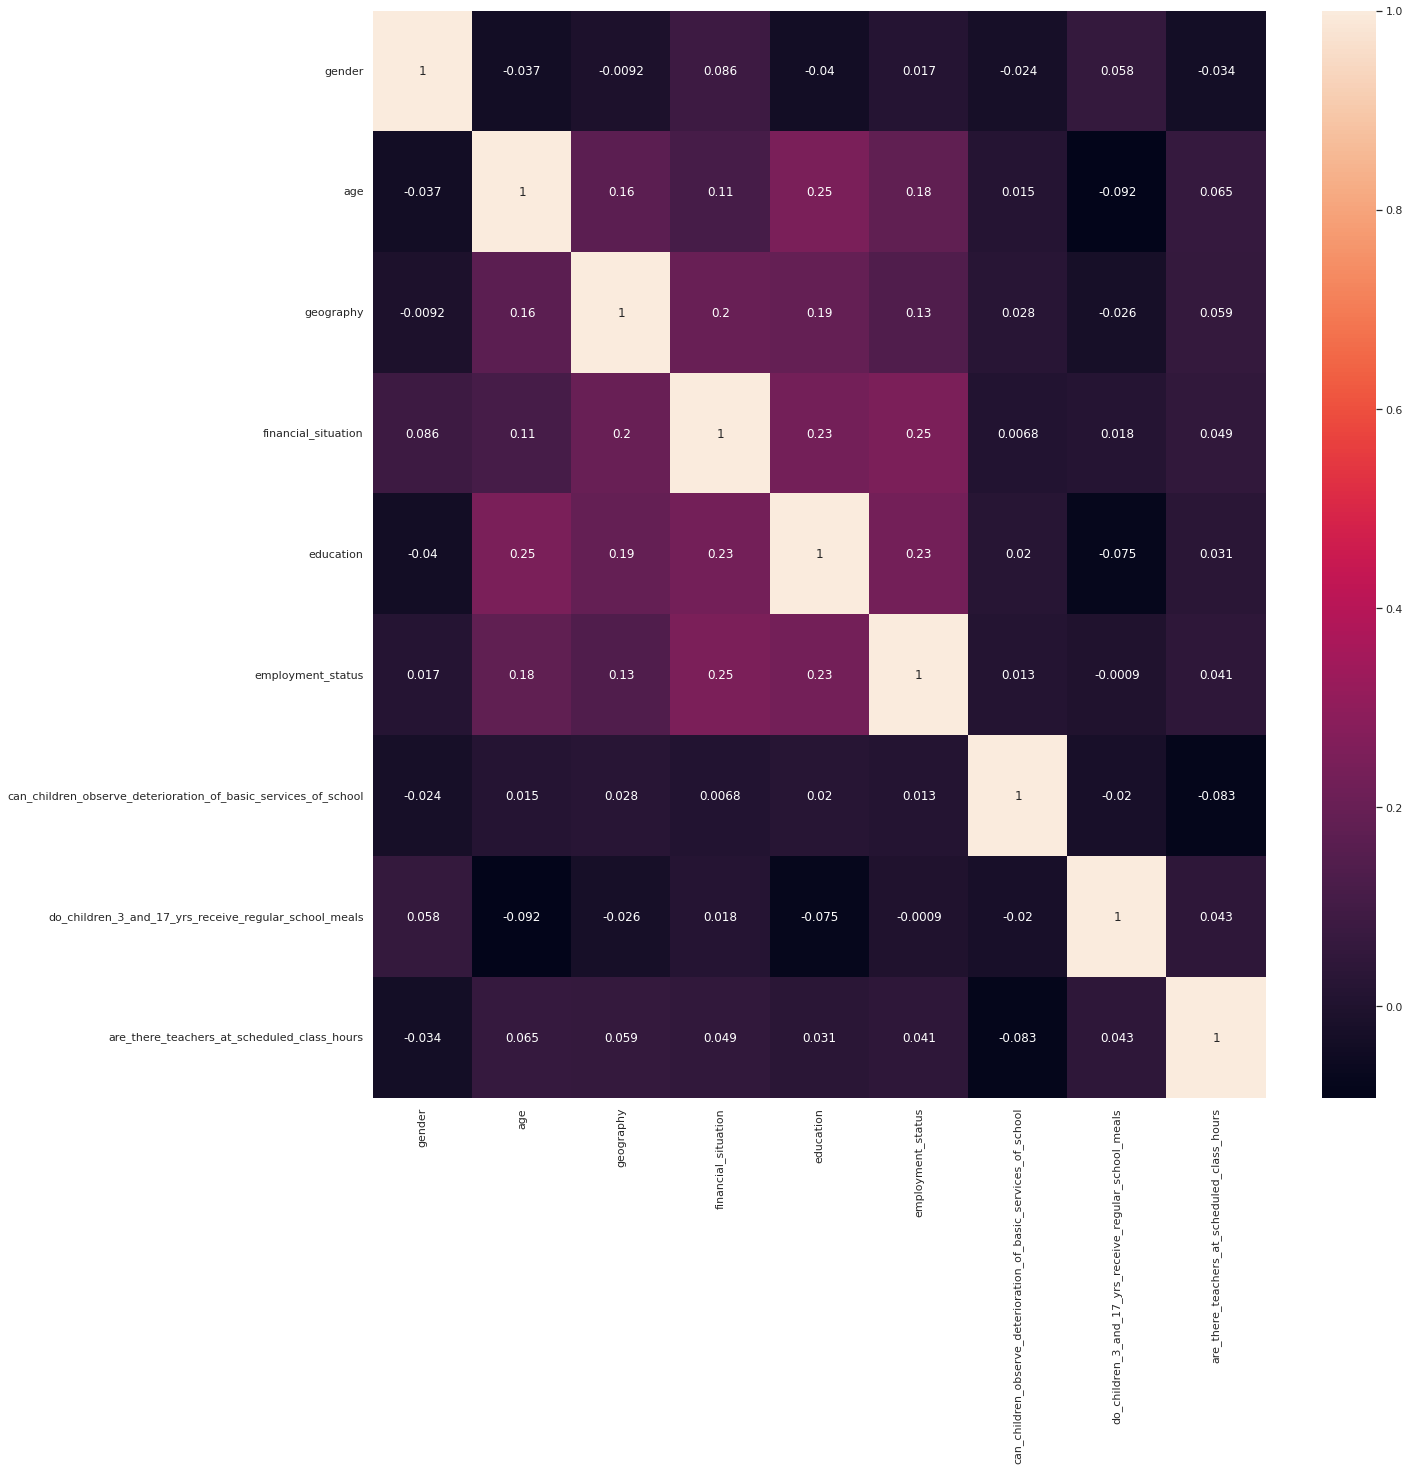

In [335]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.iloc[:,2:].corr(),annot=True)

# Data Modelling

Silhouette Score is the mean Silhouette Coefficient for all clusters, which is calculated using the mean intra-cluster distance and the mean nearest-cluster distance. This score is between -1 and 1, where the higher the score the more well-defined and distinct your clusters are.

K Means Clustering

In [336]:
from sklearn import metrics
from sklearn.cluster import KMeans

my_model = KMeans().fit(df.drop(['submission_state','submission_date'],axis=1))
labels = my_model.labels_
metrics.silhouette_score(df.drop(['submission_state','submission_date'],axis=1),labels)

0.5449854096897154

BIRCH

In [337]:
from sklearn.cluster import Birch
from numpy import unique

model = Birch(threshold=0.01, n_clusters=4)
model.fit(df.drop(['submission_state','submission_date'],axis=1))
labels = model.labels_
metrics.silhouette_score(df.drop(['submission_state','submission_date'],axis=1),labels)

0.5121948532176245

Thus choosing K Means Clustering

### K Means Clustering

In [338]:
from sklearn.cluster import KMeans
clust_df=KMeans(n_clusters=4).fit_predict(df.drop('submission_state',axis=1).iloc[:,2:])
clust_df=pd.DataFrame(clust_df,columns=['cluster'])

In [339]:
df['cluster']=clust_df['cluster']

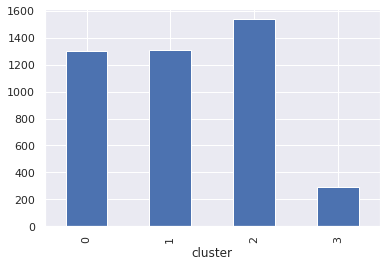

In [340]:
df.groupby('cluster')['submission_id'].count().plot.bar()

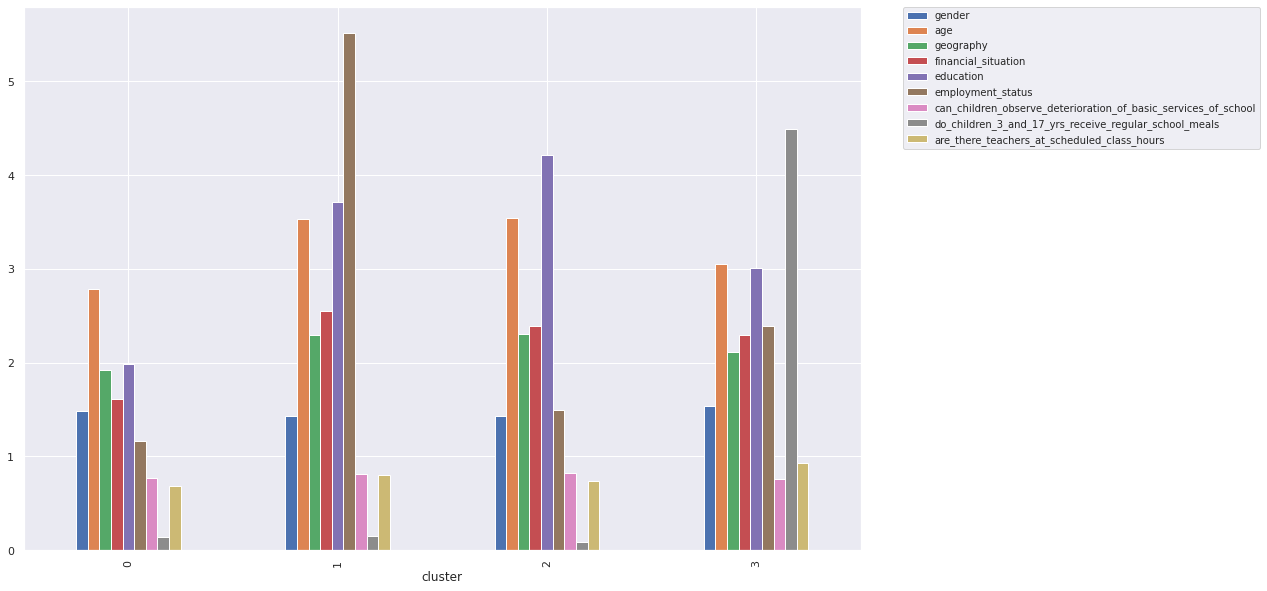

In [341]:
df.groupby('cluster').mean().iloc[:,1:].plot.bar(figsize=(15,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

### Principal Component Analysis

In [342]:
from sklearn.decomposition import TruncatedSVD,PCA
pca=PCA(2)
pca_df=pca.fit_transform(df.drop('submission_state', axis=1).iloc[:,2:])
pca_df=pd.DataFrame(pca_df,columns=['PC1','PC2'])
pca_df['gender'] = df.gender
pca_df['age'] = df.age
pca_df['geography'] = df.geography
pca_df['financial_situation']=df.financial_situation
pca_df['education']=df.education
pca_df['employment_status']=df.employment_status
pca_df['cluster']=df.cluster

In [343]:
pca_df

,PC1,PC2,gender,age,geography,financial_situation,education,employment_status,cluster
0,-1.806904,3.874348,1,5,2,3,4,0,3
1,-2.607002,0.975328,2,3,2,1,4,0,2
2,4.213055,0.699359,1,3,3,6,4,6,1
3,3.322237,-0.799207,2,4,2,2,4,6,1
4,-1.833050,2.241245,1,5,2,3,4,0,2
...,...,...,...,...,...,...,...,...,...
4431,3.401917,-0.681166,1,5,2,2,4,6,1
4432,-1.104698,-1.753295,1,5,1,2,1,2,0
4433,0.126665,3.126167,2,2,2,4,5,2,3
4434,3.648739,-0.272587,1,5,2,3,4,6,1


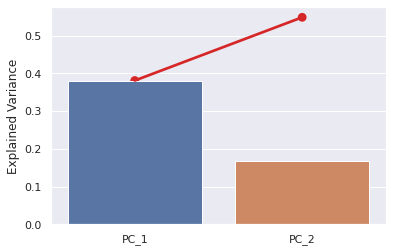

In [344]:
sns.barplot(x=['PC_1','PC_2'],y=pca.explained_variance_ratio_)
sns.pointplot(x=['PC_1','PC_2'],y=np.cumsum(pca.explained_variance_ratio_),lw=5,legend=True,label='Cumulative',color='tab:red')
plt.ylabel('Explained Variance')
plt.show()

# Visualizations

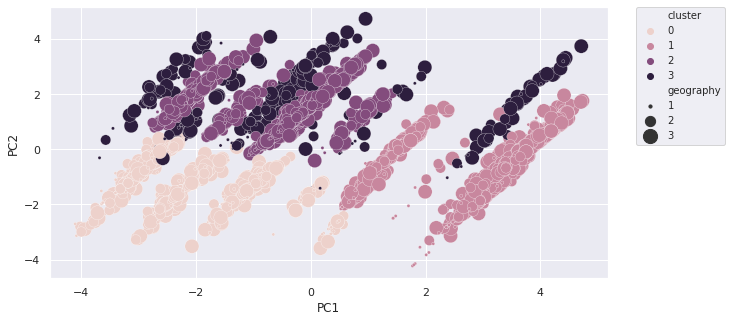

In [345]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['geography'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

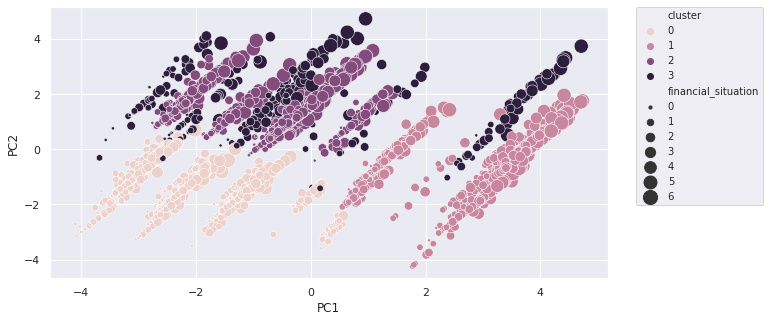

In [346]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['financial_situation'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

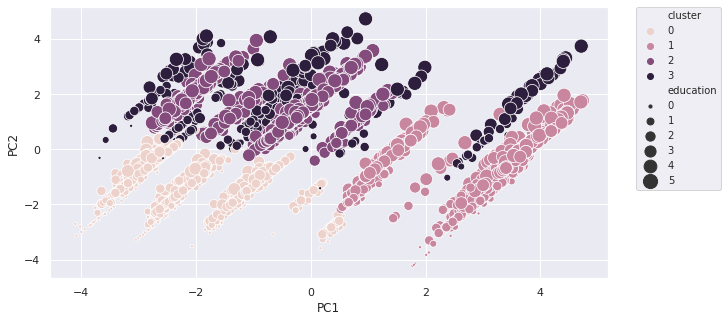

In [347]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['education'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

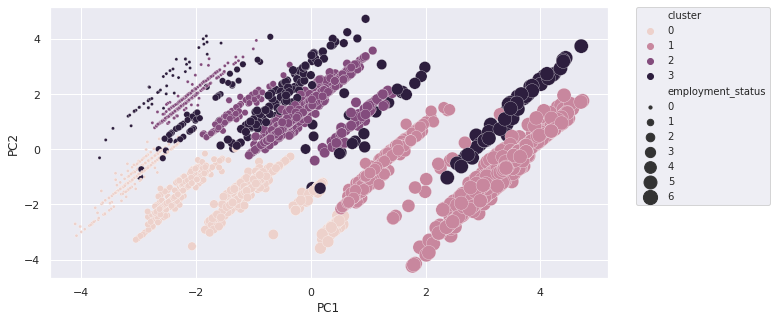

In [348]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],size=pca_df['employment_status'],hue=pca_df['cluster'],sizes=(10, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)